In [12]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [13]:
image_raw_data = tf.gfile.FastGFile("../picture/Agfa_DC-733s_0_452.JPG").read()

In [14]:
# def _int64_feature(value):
#     return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))
def _bytes_featrue(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

[[[139 146 156]
  [140 147 157]
  [137 147 156]
  ..., 
  [ 81  82  86]
  [ 62  63  67]
  [ 40  39  45]]

 [[138 145 153]
  [140 147 155]
  [140 149 156]
  ..., 
  [ 73  74  76]
  [ 59  60  64]
  [ 38  37  42]]

 [[141 148 156]
  [139 146 154]
  [138 147 154]
  ..., 
  [ 62  63  65]
  [ 58  57  62]
  [ 37  36  41]]

 ..., 
 [[ 17  15  18]
  [ 16  14  17]
  [ 17  15  16]
  ..., 
  [ 11  11  11]
  [ 12  10  13]
  [ 12  10  13]]

 [[ 15  15  15]
  [ 12  12  12]
  [ 13  13  13]
  ..., 
  [ 10   9  14]
  [ 11   9  14]
  [ 11   8  15]]

 [[ 14  16  13]
  [  9  11   8]
  [  9  11   8]
  ..., 
  [ 10   9  15]
  [ 11   8  15]
  [ 12   9  18]]]
(2304, 3072, 3)


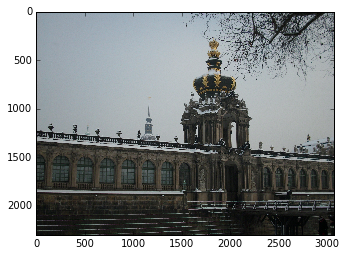

In [20]:
with tf.Session() as sess:
    img_data = tf.image.decode_jpeg(image_raw_data)
    #print img_data.eval()
    img = img_data.eval()
    print img_data.eval()
    print img.shape
    #print type(img_data.eval())
    plt.imshow(img_data.eval())
    plt.show()
    img.reshape([-1,2304*3072])
    filename = './Records/xx.tfrecords'
    writer = tf.python_io.TFRecordWriter(filename)
    
    example = tf.train.Example(features=tf.train.Features(feature={
        'image_raw_data':  _bytes_featrue(img.tostring()),
        'label': _int64_feature(2)
        #'label': _bytes_featrue(1)
    }))
    
    writer.write(example.SerializeToString())
    writer.close()

In [16]:
reader = tf.TFRecordReader()
filename_queue = tf.train.string_input_producer(["./Records/xx.tfrecords"])
_,serialized_example = reader.read(filename_queue)
features = tf.parse_single_example(
    serialized_example,
    features={
        'image_raw_data':tf.FixedLenFeature([],tf.string),
        'label': tf.FixedLenFeature([],tf.int64)
    })
images = tf.decode_raw(features['image_raw_data'],tf.uint8)
labels = tf.cast(features['label'],tf.int32)

In [17]:
sess = tf.Session()

# 启动多线程处理输入数据。
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess,coord=coord)

In [18]:
image,lable = sess.run([images,labels])
print image,lable

[139 146 156 ...,  12   9  18] 2
